In [66]:
# ML Assignment 1

In [67]:
import math
import numpy as np
import matplotlib.pyplot as plt

In [68]:
# doublecheck function
# Check if cluster's center and standard approximate to those of given factor

def doubleCheck(cluster, center, standard, num):

    xSum = 0
    ySum = 0
    V = 0
    xV = 0
    yV = 0
    
    for i in range(num):
        xSum += cluster[0][i]
        ySum += cluster[1][i]
        V += (cluster[0][i] - center[0][0])**2 + (cluster[1][i] - center[1][0])**2
        xV += (cluster[0][i] - center[0][0])**2
        yV += (cluster[1][i] - center[1][0])**2
    
    V /= num
    xV /= num
    yV/= num
    calStand = math.sqrt(V)
    xStand = math.sqrt(xV)
    yStand = math.sqrt(yV)
    
    
    print("Cor Center : (%f,%f)/Cal Center : (%f, %f)/Cor Stand : %f/Cal Stand : %f/Cal xStand : %f/Cal yStand : %f"  \
          %(center[0][0], center[1][0], xSum/num , ySum/num, standard, calStand, xStand, yStand))
    
    

In [69]:
center0 = [[5],[10]] #set center of cluster 0
standard0 = 1 #set standard of cluster 0

center1 = [[10],[5]] #set center of cluster1
standard1 = 1 #set standard of cluster1
num = 500 #set learning number and testing number

lrnCluster0 = np.random.normal(center0, standard0, [2,num])  #create learning cluster 0
lrnCluster1 = np.random.normal(center1, standard1, [2,num])     #create learning cluster 1

tstCluster0 = np.random.normal(center0, standard0, [2,num])  #create testing cluster 0
tstCluster1 = np.random.normal(center1, standard1, [2,num])     #create testing cluster 1

In [70]:
#double checking created clusters have given factors
doubleCheck(lrnCluster0, center0, standard0, num)
doubleCheck(lrnCluster1, center1, standard1, num)
doubleCheck(tstCluster0, center0, standard0, num)
doubleCheck(tstCluster1, center1, standard1, num)


Cor Center : (5.000000,10.000000)/Cal Center : (4.999608, 9.997224)/Cor Stand : 1.000000/Cal Stand : 1.375025/Cal xStand : 0.999380/Cal yStand : 0.944423
Cor Center : (10.000000,5.000000)/Cal Center : (9.931871, 4.971295)/Cor Stand : 1.000000/Cal Stand : 1.376874/Cal xStand : 0.951756/Cal yStand : 0.994959
Cor Center : (5.000000,10.000000)/Cal Center : (4.947644, 10.008917)/Cor Stand : 1.000000/Cal Stand : 1.372252/Cal xStand : 0.976052/Cal yStand : 0.964572
Cor Center : (10.000000,5.000000)/Cal Center : (10.070758, 5.014439)/Cor Stand : 1.000000/Cal Stand : 1.411793/Cal xStand : 1.038964/Cal yStand : 0.955883


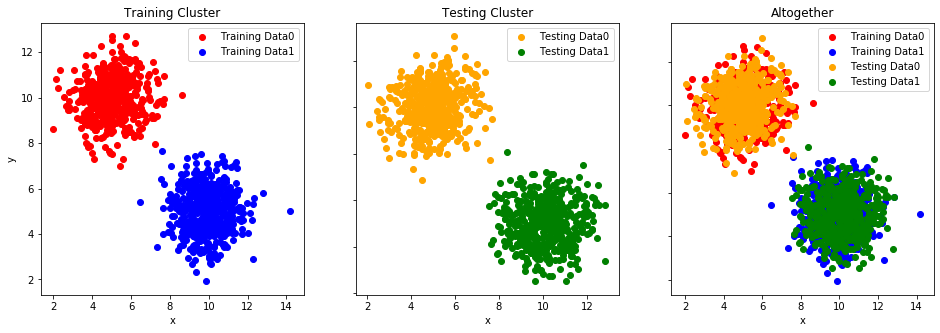

In [77]:
#plot the training and testing datasets

fig, axs = plt.subplots(1, 3, figsize = (16,5))


axs[0].set_title('Training Cluster')
axs[1].set_title('Testing Cluster')
axs[2].set_title('Altogether')

axs[0].scatter(lrnCluster0[0], lrnCluster0[1], color = 'red', label = 'Training Data0')
axs[0].scatter(lrnCluster1[0], lrnCluster1[1], color = 'blue', label = 'Training Data1')



axs[1].scatter(tstCluster0[0], tstCluster0[1], color = 'orange', label = 'Testing Data0')
axs[1].scatter(tstCluster1[0], tstCluster1[1], color = 'green', label = 'Testing Data1')

axs[2].scatter(lrnCluster0[0], lrnCluster0[1], color = 'red', label = 'Training Data0')
axs[2].scatter(lrnCluster1[0], lrnCluster1[1], color = 'blue', label = 'Training Data1')
axs[2].scatter(tstCluster0[0], tstCluster0[1], color = 'orange', label = 'Testing Data0')
axs[2].scatter(tstCluster1[0], tstCluster1[1], color = 'green', label = 'Testing Data1')

axs[0].legend()
axs[1].legend()
axs[2].legend()

for ax in axs.flat:
    ax.set(xlabel='x', ylabel='y')

for ax in axs.flat:
    ax.label_outer()